# Importing the required libraries

In [62]:
%matplotlib inline

#numpy for computations
import numpy as np
np.set_printoptions(precision=5)

#matplotlib for plotting and animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import cm

#to play the animation as a video
from IPython.display import HTML

* HTML module from Ipython.display and ffmpeg is used to convert the animation into a
video and make it playable in the notebook.

* `ipython` can be installed using `pip by pip3 install ipython` and `ffmpeg` can be installed
inside the python environment using `sudo apt install ffmpeg`.

# Simulated annealing to find the global minima of a n-variable function

## Probability of making a worse move

In [63]:
def probability(e_current,e_neighbour,temp):
    return np.exp((e_current-e_neighbour)/temp,dtype=np.float128)

The above cell contains the function `probability()` which returns the probability of making a worse move.
It takes the arguments:

* `e_current`: holds the current value of the function

* `e_neighbour`: holds the new value of the function

* `temp`: represents the 'temperature' of the system

If the new value of the function ($E_{new}$) is greater than the current value ($E_{now}$) (i.e. `e_current`<`e_neighbour`) it returns the value $$P(move)=e^{-\frac{E_{new}-E_{now}}{T}}$$

representing the probability of accepting a worse move.

## The `simulated_annealing()` function

The `simulated_annealing()` function performs simulated annealing on a given n-variable function `f` given a starting point tuple `start`, a starting point temperature `temp_start`, a minimum temperature `temp_min` and a decay rate `decay` to determine its global minimum.


The cell below contains the `simulated_annealing()` function. It takes the arguments:

* `f`: 
It represents the n-variable mathematical function on which simualted annealing is to be done.

* `start`:
 It is a n-dimensional tuple containing the starting point.

* `temp_start` ($T_{start}$): 
It denotes the inital temperature.

* `temp_min` ($T_{min}$): 
It denotes the final temperature.

* `decay` ($\alpha$): 
It is the rate at which the inital temperature, `temp_start` decays to become `temp_min`. It is assumed that the temperature decays exponentially. The process continues till $T_{min}=T_{inital}.(\alpha)^{n}$, where $n$ is the number of iterations. The values of $T_{start}$, $T_{min}$ and $\alpha$ determine the number of iterations of the process.

In [64]:
#global variable to help in plotting
x_ordered=[]

In [65]:
#generalized simulated_annealing

#f is a n-variable function
#start: n-dimensional tuple containing the starting point



def simulated_annealing(f,start,temp_start,temp_min,decay):
    
    #converting the start tuple to an numpy array
    start=np.array(start,dtype=np.float128)

    #stores the current temperature
    temp_current = temp_start

    #stores the current value of the input array
    x_current = np.copy(start)

    #stores the value of the input array for the lowest value of the function
    x_best = np.copy(start)

    while temp_current>temp_min:

        #generate neighbour candidate
        x_new=x_current+(np.random.random_sample(len(start),)-0.5)*10*temp_current

        #to accept a worse move with given probability or always accept a better move
        if probability(f(*x_current),f(*x_new),temp_current)>=np.random.random_sample():
            x_current=np.copy(x_new)

        #check if the new value is better
        if f(*x_new)<f(*x_best):
            x_best=np.copy(x_new)
        
        #update temperature
        temp_current=temp_current*decay

        #to help in plotting (only for single variable function)
        if len(start)==1:
            x_ordered.append(*x_new)

    return x_best,f(*x_best)


## Algorithm of the simulated annealing process

* The line `x_new=x_current+(np.random.random_sample(len(start),)-0.5)*10*temp_current` randomly generates a new input array `x_new` from a given input array `x_current`.


* After the new input array is created, there are three choices available:
    * If the function value corresponding to the new input array is lower than the best obtained function value till now, the new input array is accepted as the 'best' input array for the time being (`x_best=np.copy(x_new)`).

    * If `f(*x_current)`>`f(*x_new)` (i.e. the new function value is better than the current value), the condition `probability(f(*x_current),f(*x_new),temp_current)>=np.random.random_sample()` is always true, therefore the move is always accepted (`x_current=np.copy(x_new)`).

    * If `f(*x_current)`<`f(*x_new)` (i.e. the new function value is worse than the current value), the condition `probability(f(*x_current),f(*x_new),temp_current)>=np.random.random_sample()` is true with a probability of $e^{-\frac{E_{new}-E_{now}}{T}}$ . Therefore the move is accepted with a probability of  $e^{-\frac{E_{new}-E_{now}}{T}}$ (`x_current=np.copy(x_new)`).

* The line `temp_current=temp_current*decay` updates the temperature.

* The above three steps goes on repeat till the point where the current temperature (`temp_current`) becomes less than the minimum temperature (`temp_min`) and the final input array `x_best` and the function value for the final input array `f(*x_best)` is returned.  
    

## Sample functions for testing

In [66]:
def yfunc(x):
    return x**2 + np.sin(8*x)

def booth(x, y):
    return (x+2*y-7)**2+(2*x+y-5)**2

### Miniminzing the function $f(x)=x^{2}+\sin{8x}$

In [67]:
x_ordered.clear()
best_x_val, global_minima=simulated_annealing(yfunc,(0,),10,1e-2,0.95)
print(f"The global minima of the function is {global_minima} located at x={best_x_val}.")

The global minima of the function is -0.9625665314897531 located at x=[-0.19161].


In the above cell the `simulated_annealing()` function is called with the function `yfunc` with starting point at x=0, (`start=(0,)`), with `temp_start` as 10, `temp_min` as 1e-2 and the decay rate `decay` as 0.95.

The below cell plots the points obtained during different iterations of the simulated annealing process on `yfunc` to show the progress of the search.

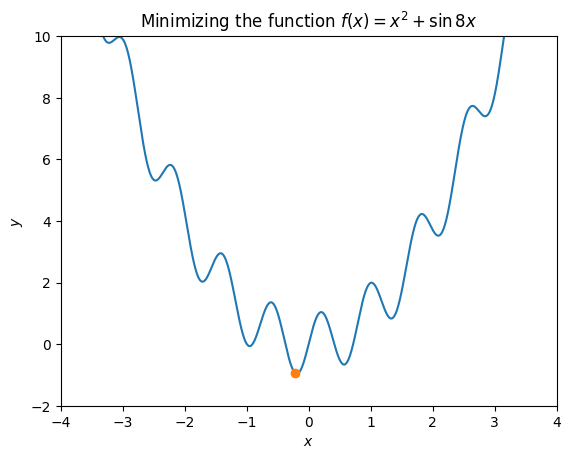

In [68]:
#initalizing the plot
fig, ax = plt.subplots()

#defining array of x values in the given range
x_coord=np.linspace(-4,4,1000)


#setting up x-limits as -5 to 5 and y-limits as 0 to 50
ax.axis([-4,4,-2,10])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Minimizing the function $f(x)=x^{2}+\sin{8x}$')

#plotting the given function
ax.plot(x_coord,yfunc(x_coord))


# create a point in the axes (it is the starting point)
point, = ax.plot(0,yfunc(0), marker="o")

def update(num):

    # obtain point coordinates 
    x=x_ordered[num]

    # set the coordinates of the point
    point.set_data([x],[yfunc(x)])
    return point,

#creating the animation using the update function
ani = FuncAnimation(fig, update, interval=100, blit=True, repeat=True,frames=range(len(x_ordered)))

#converting it into video format
HTML(ani.to_html5_video())


### Minimizing the Booth function $f(x,y)=(x+2y-7)^{2}+(2x+y-5)^{2}$

The global minima of this function is $0$ at the point $(x,y)=(1,3)$.

In [69]:
best_input, global_minima2=simulated_annealing(booth,(5,5),10,1e-2,0.95)
print(f"The global minima of the function is {global_minima2} located at {best_input}.")

The global minima of the function is 0.0015003056221288048 located at [0.97965 3.00399].


## Effect on changing the parameters of simulated annealing

* Increasing the inital temperature, lowering the final temperature and getting the decay rate closer to 1 increases the number of iterations, increasing the time taken for the computation. In most of the cases this leads to improvement in accuracy and better solutions.

In [70]:
best_input, global_minima2=simulated_annealing(booth,(10,10),1e3,1e-7,0.9999)
print(f"The global minima of the function is {global_minima2} located at {best_input}.")
%timeit simulated_annealing(booth,(10,10),1e3,1e-7,0.999)

The global minima of the function is 1.355464239318362e-09 located at [0.99998 3.00003].
628 ms ± 48.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)



* If the starting point is farther away from the global minima and the inital temperature is low, there is a high chance that the actual global minima of the function won't be reached.


In [71]:
best_input, global_minima2=simulated_annealing(booth,(1000,1000),10,1e-7,0.95)
print(f"The global minima of the function is {global_minima2} located at {best_input}.")
%timeit simulated_annealing(booth,(1000,1000),10,1e-7,0.95)

The global minima of the function is 11285415.97693412 located at [770.95973 816.59912].


/tmp/ipykernel_88899/2715256220.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp((e_current-e_neighbour)/temp,dtype=np.float128)


9.58 ms ± 917 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# The travelling salesman problem

## Reading the input files and obtaining the coordinates of the cities 

### Collecting data for the 10 city travelling salesman problem 

The cell below contains the code to read through the input files and obtain the coordinates of 10 points as a 
10 x 2 numpy array named `coordinate_data1`.

In [72]:
#reading the given file and seperating the first line containing number of variables
fh=open("tsp_10.txt",'r')
content=fh.readlines()[1:]
fh.close()

#we write only the coordinate data back to a different file 
fh1=open("tsp_10_2.txt",'w')
fh1.writelines(content)
fh1.close()

#coordinates_data1 is a 2d numpy array containing coordinates of all points given
coordinates_data1=np.loadtxt("tsp_10_2.txt")
num_of_cities1=len(coordinates_data1)

### Collecting data for the 100 city travelling salesman problem 

The cell below contains the code to read through the input files and obtain the coordinates of 100 points as a 
100 x 2 numpy array named `coordinate_data2`.

In [73]:
#reading the given file and seperating the first line containing number of variables
fh2=open("tsp_100.txt",'r')
content1=fh2.readlines()[1:]
fh2.close()

#we write only the coordinate data back to a different file
fh3=open("tsp_100_2.txt",'w')
fh3.writelines(content1)
fh3.close()

#coordinates_data2 is a 2d numpy array containing coordinates of all points given
coordinates_data2=np.loadtxt("tsp_100_2.txt")
num_of_cities2=len(coordinates_data2)

## Defining `euclidean_distance()` and `total_distance()`

The cell below contains `euclidean_distance(p1,p2)` function which returns the distance between two points in 2D.
The points `p1` and `p2` can be either lists, arrays or tuples with two elements. If the points are $(x_{1},y_{1})$ and $(x_{2},y_{2})$, the function returns $\sqrt{(x_{1}-x_{2})^{2}+(y_{1}-y_{2})^{2}}$.

In [74]:
#returns the euclidean distance between two points in 2D (points are either lists, arrays or tuples)
def euclidean_distance(p1,p2):
    return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

The cell below contains `total_distance(solution,coordinates)` function.

* It takes the arguments:

    * `solution` is a 1-D numpy array that contains entries from 0 to `len(solution)-1` in any order, signifying the order the salesman should start and travel and then return back to the start. 

    * `coordinates` is a 2-D numpy array that contains the coordinates of the cities (like `coordinate_data1` and `coordinate_data2`). `len(coordinates)` should be same as `len(solution)`.

* It returns the total path length taken by the salesman to start from the first element of the `solution` through the other elements in the same order and back to the start. 


In [75]:
#sums up all distances from inital point to final point and back to the inital point on the given path
def total_distance(solution,coordinates):
    dist=0
    for i in range(-1,len(solution)-1):
        dist+=euclidean_distance(coordinates[solution[i]],coordinates[solution[i+1]])
    return dist

## Defining the inital solution for both cases

In [76]:
#initial solution for 10 cities tsp
inital_solution1=np.linspace(0,9,10,dtype=int)

#initial solution for 100 cities tsp
inital_solution2=np.linspace(0,99,100,dtype=int)

#printing out the initial solution and the total path length
print(f"Initial solution for the 10 city travelling salesman problem {inital_solution1}")
print(f"Total path length corresponding to inital solution for the 10 city problem: {total_distance(inital_solution1,coordinates=coordinates_data1)}\n")
print(f"Initial solution for the 100 city travelling salesman problem {inital_solution2}")
print(f"Total path length corresponding to inital solution for the 100 city problem: {total_distance(inital_solution2,coordinates=coordinates_data2)}")

Initial solution for the 10 city travelling salesman problem [0 1 2 3 4 5 6 7 8 9]
Total path length corresponding to inital solution for the 10 city problem: 56.41824974726559

Initial solution for the 100 city travelling salesman problem [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Total path length corresponding to inital solution for the 100 city problem: 500.7984267365113


## Finding the best path using simulated annealing

In [77]:
#solving the TSP for a general number of cities

def tsp(inital_solution,coordinates_data,inital_temp,minimum_temp,decay_rate):

    #defining current_temp, current_solution, best_solution
    current_temp=inital_temp
    current_solution=np.copy(inital_solution)
    best_solution=np.copy(inital_solution)

    while current_temp>minimum_temp:

        #generate a neighbor new_solution by swapping two random entries of current_solution
        rand1,rand2=np.random.randint(low=0,high=len(inital_solution),size=2)
        new_solution=np.copy(current_solution)
        new_solution[[rand1,rand2]]=new_solution[[rand2,rand1]]

        #accept a worse move with given probability or always accept a better move
        if probability(total_distance(current_solution,coordinates_data),
                       total_distance(new_solution,coordinates_data),current_temp)>=np.random.random_sample():
            current_solution=np.copy(new_solution)

        #check if the new value is better 
        if (total_distance(new_solution,coordinates_data)<
            total_distance(best_solution,coordinates_data)):
            best_solution=np.copy(new_solution)
            
        #update temperature
        current_temp=current_temp*decay_rate

    #return the best solution obtained and the correspondig path length
    return best_solution,total_distance(best_solution,coordinates_data)

### Defining the `tsp()` function

The above cell contains the function `tsp` which searches for the optimal path (i.e. with minimum path length) using simulated annealing.

It takes the arguments:
* `inital_solution`: It is a 1-D numpy array that contains the starting point for the search.

* `coordinates_data`:It is a 2-D numpy array that contains the coordinates of the cities (like `coordinate_data1` and `coordinate_data2`).

* `initial_temp`: It refers to the inital temperature for the search.

* `minimum_temp`: It refers to the final temperature till which the search should continue.

* `decay_rate`: It is the rate at which the inital temperature, `initial_temp` decays to become `minimum_temp`. It is assumed that the temperature decays exponentially. 

### Algorithm used in the `tsp()` function 

* A new solution `new_solution` is created by swapping two random elements of the numpy array `current_solution`.

* After the new input array is created, there are three choices available:
    * If the total path length corresponding to the new input array is lower than the best obtained path length value till now, the new input array is accepted as the 'best' input array for the time being (`best_solution=np.copy(new_solution)`).

    * If the new path length is better than the current path length, the condition `probability(e_current,e_neighbour,temp)>np.random.random_sample()` is always true, therefore the move is always accepted (`current_solution=np.copy(new_solution)`).

    * If the new path length value is worse than the current path length, the condition `probability(e_current,e_neighbour,temp)>np.random.random_sample()` is true with a probability of $e^{-\frac{E_{new}-E_{now}}{T}}$ . Therefore the move is accepted with a probability of  $e^{-\frac{E_{new}-E_{now}}{T}}$ (`current_solution=np.copy(new_solution)`).

* The line `current_temp=current_temp*decay_rate` updates the temperature.

* The above three steps goes on repeat till the point where the current temperature (`current_temp`) becomes less than the minimum temperature (`minimum_temp`) and the final path `best_solution` and the corresponding total path length is returned.  

## Calling the `tsp()` function to solve the 10 city TSP

The code in the cell below calls the `tsp()` function with `inital_solution` as `inital_solution1`, `coordinates_data` as `coordinates_data1` (i.e. array containing the location of the 10 cities),`inital_temp` as 1e9, `minimum_temp` as 1e-11 and the `decay_rate` as 0.999. The best path and the correspnding path length is printed.

In [78]:
best1,shortest1=tsp(inital_solution=inital_solution1,
                    coordinates_data=coordinates_data1,inital_temp=1e9,minimum_temp=1e-11,
                    decay_rate=0.999)
print(f"The best path is {best1}")
print(f"Path length corresponding to the best path is {shortest1}.")

The best path is [0 2 8 9 7 1 3 4 5 6]
Path length corresponding to the best path is 34.076561394636684.


* The cell below contains the code to plot the locations of cities in the 10-city TSP and the optimal path.
* The cities are plotted as a scatter plot.
* Using the path obtained (`best1`) from the `tsp()` function, we reorder the arrays of the x-coordinates and y-coordinates of the cities, and plotted to show the optimal path. 

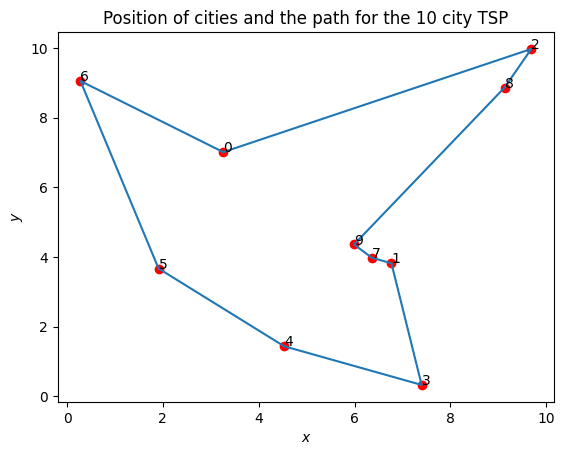

In [79]:
#extracting the x and y coordinates of the cities
x_data=coordinates_data1[:,0]
y_data=coordinates_data1[:,1]

#plot the positions of the cities
plt.scatter(x_data,y_data,color="red")

#adding labels, title
plt.title("Position of cities and the path for the 10 city TSP")
plt.xlabel("$x$")
plt.ylabel("$y$")

#adding the index of the city to the corresponding point
for i in range(len(x_data)):
    plt.annotate(i,(x_data[i],y_data[i]))
    
x_best=np.copy(x_data)
y_best=np.copy(y_data)

#reordering the array of coordinates of cities according the order output by the tsp() function 
x_best=x_best[best1]
y_best=y_best[best1]

#plotting the optimal path
plt.plot(np.append(x_best,x_best[0]),np.append(y_best,y_best[0]))

plt.show()

## Calling the `tsp()` function to solve the 100 city TSP

The code in the cell below calls the `tsp()` function with `inital_solution` as `inital_solution2`, `coordinates_data` as `coordinates_data2` (i.e. array containing the location of the 100 cities),`inital_temp` as 1e10, `minimum_temp` as 1e-16 and the `decay_rate` as 0.999. The best path and the correspnding path length is printed.

In [80]:
best2,shortest2=tsp(inital_solution=inital_solution2,
                    coordinates_data=coordinates_data2,inital_temp=1e10,minimum_temp=1e-16,
                    decay_rate=0.999)
print(f"The best path is {best2}")
print(f"Path length corresponding to the best path is {shortest2}.")

/tmp/ipykernel_88899/2715256220.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp((e_current-e_neighbour)/temp,dtype=np.float128)


The best path is [21 71 88 41 48 75 58 46 82 40 74 24 42 50 39 52 27 14 93 25 86 87 45 56
 47 13 23 35 77 91 20 83 98 49 51 68 92 72 57 38 63  0 34 17 90 59 97 53
 54  6 76 16  4 89  2 69 43 79 37 11  9 28  5 61 60 94  8 26 78 67 10 85
 62 33 32 44 81  1 70 66 64 96 73 29 31 55  3 22  7 95 12 84 15 30 19 65
 99 18 80 36]
Path length corresponding to the best path is 128.84499851893003.


* The cell below contains the code to plot the locations of cities in the 10-city TSP and the optimal path.
* The cities are plotted as a scatter plot.
* Using the path obtained (`best2`) from the `tsp()` function, we reorder the arrays of the x-coordinates and y-coordinates of the cities, and plotted to show the optimal path. 

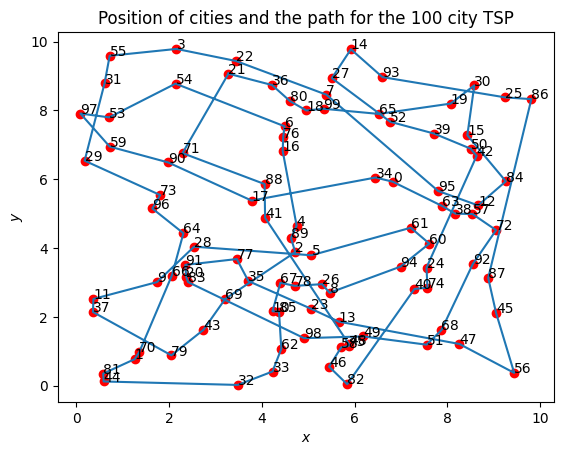

In [81]:
#extracting the x and y coordinates of the cities
x_data2=coordinates_data2[:,0]
y_data2=coordinates_data2[:,1]

#plot the positions of the cities
plt.scatter(x_data2,y_data2,color="red")

#adding labels, title
plt.title("Position of cities and the path for the 100 city TSP")
plt.xlabel("$x$")
plt.ylabel("$y$")

#adding the index of the city to the corresponding point
for i in range(len(x_data2)):
    plt.annotate(i,(x_data2[i],y_data2[i]))


x_best2=np.copy(x_data2)
y_best2=np.copy(y_data2)

#reordering the array of coordinates of cities according the order output by the tsp() function 
x_best2=x_best2[best2]
y_best2=y_best2[best2]

#plotting the optimal path
plt.plot(np.append(x_best2,x_best2[0]),np.append(y_best2,y_best2[0]))
plt.show()

## Effect of changing the simulated annealing parameters

Increasing the inital temperature, lowering the final temperature and getting the decay rate closer to 1 increases the number of iterations, increasing the time taken for the computation. In most of the cases this leads to improvement in accuracy and better solutions.

The below cell runs the same `tsp()` function on the 100 city TSP with `inital_temp` as 1e10, `minimum_temp` as 1e-16 and `decay_rate` as 0.99999. We obtain a much better solution with a total path length of around 95.01 units. But the computation time was extremely long, ~108 minutes.

In [82]:
'''
best2,shortest2=tsp(inital_solution=inital_solution2,
                    coordinates_data=coordinates_data2,inital_temp=1e10,
                    minimum_temp=1e-16,decay_rate=0.99999)
print(best2,shortest2)
'''

'\nbest2,shortest2=tsp(inital_solution=inital_solution2,\n                    coordinates_data=coordinates_data2,inital_temp=1e10,\n                    minimum_temp=1e-16,decay_rate=0.99999)\nprint(best2,shortest2)\n'

The below cell contains the better solution obtained.

In [83]:
better_solution=[22,21,54,3,55,31,97,53,71,16,88,17,41,4,89,5,2,
                 77,96,29,59,90,73,64,28,91,66,9,20,83,35,69,43,
                 79,70,1,44,81,37,11,32,33,62,85,10,67,78,98,
                 46,82,56,45,47,68,51,49,48,75,58,94,60,95,63,38,57,
                 12,72,87,92,24,74,40,13,23,8,26,61,0,34,76,6,18,99,
                 65,52,39,15,50,42,84,86,25,30,19,93,14,27,7,80,36]

print(total_distance(better_solution,coordinates_data2))

95.01007732087162


The cell below plots the better solution obtained before.

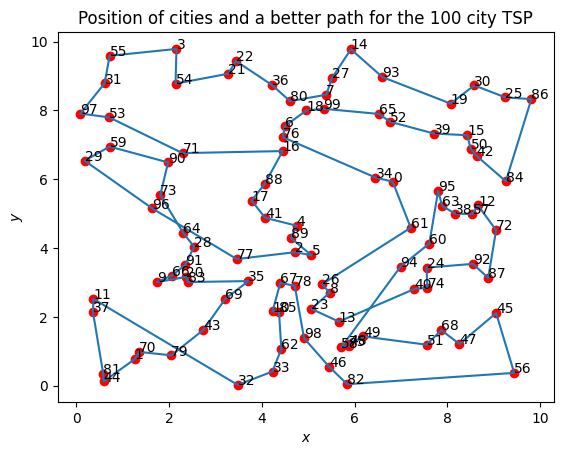

In [84]:
#extracting the x and y coordinates of the cities
x_data3=coordinates_data2[:,0]
y_data3=coordinates_data2[:,1]

#plot the positions of the cities
plt.scatter(x_data3,y_data3,color="red")

#adding labels, title
plt.title("Position of cities and a better path for the 100 city TSP")
plt.xlabel("$x$")
plt.ylabel("$y$")

#adding the index of the city to the corresponding point
for i in range(len(x_data3)):
    plt.annotate(i,(x_data3[i],y_data3[i]))


x_best3=np.copy(x_data3)
y_best3=np.copy(y_data3)

#reordering the array of coordinates of cities according the order output by the tsp() function 
x_best3=x_best3[better_solution]
y_best3=y_best3[better_solution]

#plotting the optimal path
plt.plot(np.append(x_best3,x_best3[0]),np.append(y_best3,y_best3[0]))
plt.show()